-------------------

# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


-----------

# Data Prepocessing

## Data reading

In [2]:
df = pd.read_csv('dataset/gwl-monthly.csv')

### read top 5

In [3]:
df.head()

,STATION,MSMT_DATE,WLM_RPE,WLM_RPE_QC,WLM_GSE,WLM_GSE_QC,RPE_WSE,RPE_WSE_QC,GSE_WSE,GSE_WSE_QC,WSE,WSE_QC
0,03N04E11L001M,12/1/2022,NaN,255,NaN,255,NaN,255,NaN,255,NaN,255
1,04N04E01N001M,12/1/2022,0.00,1,0.00,1,NaN,255,NaN,255,NaN,255
2,04N04E02B001M,12/1/2022,10.73,1,9.63,1,NaN,255,NaN,255,NaN,255
3,04N04E10Q001M,12/1/2022,NaN,255,NaN,255,NaN,255,NaN,255,NaN,255
4,04N04E10Q002M,12/1/2022,NaN,255,NaN,255,NaN,255,NaN,255,NaN,255


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81066 entries, 0 to 81065
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STATION     81066 non-null  object 
 1   MSMT_DATE   81066 non-null  object 
 2   WLM_RPE     80843 non-null  float64
 3   WLM_RPE_QC  81066 non-null  int64  
 4   WLM_GSE     80500 non-null  float64
 5   WLM_GSE_QC  81066 non-null  int64  
 6   RPE_WSE     65944 non-null  float64
 7   RPE_WSE_QC  81066 non-null  int64  
 8   GSE_WSE     65436 non-null  float64
 9   GSE_WSE_QC  81066 non-null  int64  
 10  WSE         65735 non-null  float64
 11  WSE_QC      81066 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 7.4+ MB


In [5]:
df.shape

(81066, 12)

In [6]:
df.columns

Index(['STATION', 'MSMT_DATE', 'WLM_RPE', 'WLM_RPE_QC', 'WLM_GSE',
       'WLM_GSE_QC', 'RPE_WSE', 'RPE_WSE_QC', 'GSE_WSE', 'GSE_WSE_QC', 'WSE',
       'WSE_QC'],
      dtype='object')

-------------------

## Data clearing

### checking missing values

In [7]:
# Check how many missing values in the dataset
print("The total missing values in this dataset:- " , len(df[df.isnull().any(axis=1)]))

The total missing values in this dataset:-  15630


### Handle missing value by using dropna method

In [8]:
df.dropna(inplace=True)

### checking duplicate Values

In [9]:
# Check how many duplicate values in the dataset
print("The total duplicate values in this dataset:- " , df.duplicated().sum())

The total duplicate values in this dataset:-  0


In [10]:
# Handling duplicate values
# Dropping all duplicate values from the dataset permanently
df_unique = df.drop_duplicates()

In [11]:
df.shape

(65436, 12)

In [12]:
df.columns

Index(['STATION', 'MSMT_DATE', 'WLM_RPE', 'WLM_RPE_QC', 'WLM_GSE',
       'WLM_GSE_QC', 'RPE_WSE', 'RPE_WSE_QC', 'GSE_WSE', 'GSE_WSE_QC', 'WSE',
       'WSE_QC'],
      dtype='object')

----------------------

### Checking outliers

In [13]:
# Define a function to detect outliers based on the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

# Columns to check for outliers
columns_to_check = ['WLM_RPE', 'WSE_QC', 'WLM_GSE', 'RPE_WSE', 'GSE_WSE', 'WSE']

# Calculate the number of outliers in each column
outliers_count = {column: detect_outliers_iqr(df, column) for column in columns_to_check}
outliers_count


{'WLM_RPE': 4761,
 'WSE_QC': 14679,
 'WLM_GSE': 4761,
 'RPE_WSE': 2648,
 'GSE_WSE': 2652,
 'WSE': 6428}

----------------------

### Drop All Outliers from dataset

In [14]:
# Define a function to remove outliers based on the IQR method for a given column
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the outlier removal for each column individually
df = df.copy()
for column in columns_to_check:
    df = remove_outliers_iqr(df, column)

# Check the new shape of the dataset to see how many records remain
df.shape

(40904, 12)

------------------

### Describtive Statistics

In [15]:
df.describe()

,WLM_RPE,WLM_RPE_QC,WLM_GSE,WLM_GSE_QC,RPE_WSE,RPE_WSE_QC,GSE_WSE,GSE_WSE_QC,WSE,WSE_QC
count,40904.000000,40904.0,40904.000000,40904.0,40904.000000,40904.0,40904.000000,40904.0,40904.000000,40904.0
mean,120.181309,1.0,118.255907,1.0,30.090651,1.0,28.165248,1.0,90.090658,1.0
std,82.169046,0.0,82.126939,0.0,22.229544,0.0,22.236361,0.0,69.435030,0.0
min,-0.570000,1.0,-3.170000,1.0,-4.467000,1.0,-11.759000,1.0,-62.023000,1.0
25%,48.740000,1.0,46.880000,1.0,12.913750,1.0,11.124000,1.0,25.690000,1.0
50%,109.560000,1.0,108.360000,1.0,23.545000,1.0,21.678500,1.0,96.585000,1.0
75%,183.420000,1.0,182.420000,1.0,41.742250,1.0,39.685500,1.0,136.813500,1.0
max,316.180000,1.0,314.260000,1.0,93.194000,1.0,88.906000,1.0,287.464000,1.0


-------------------

# DataVisualization

In [16]:
# Set the aesthetics for the plots
sns.set_style("whitegrid")

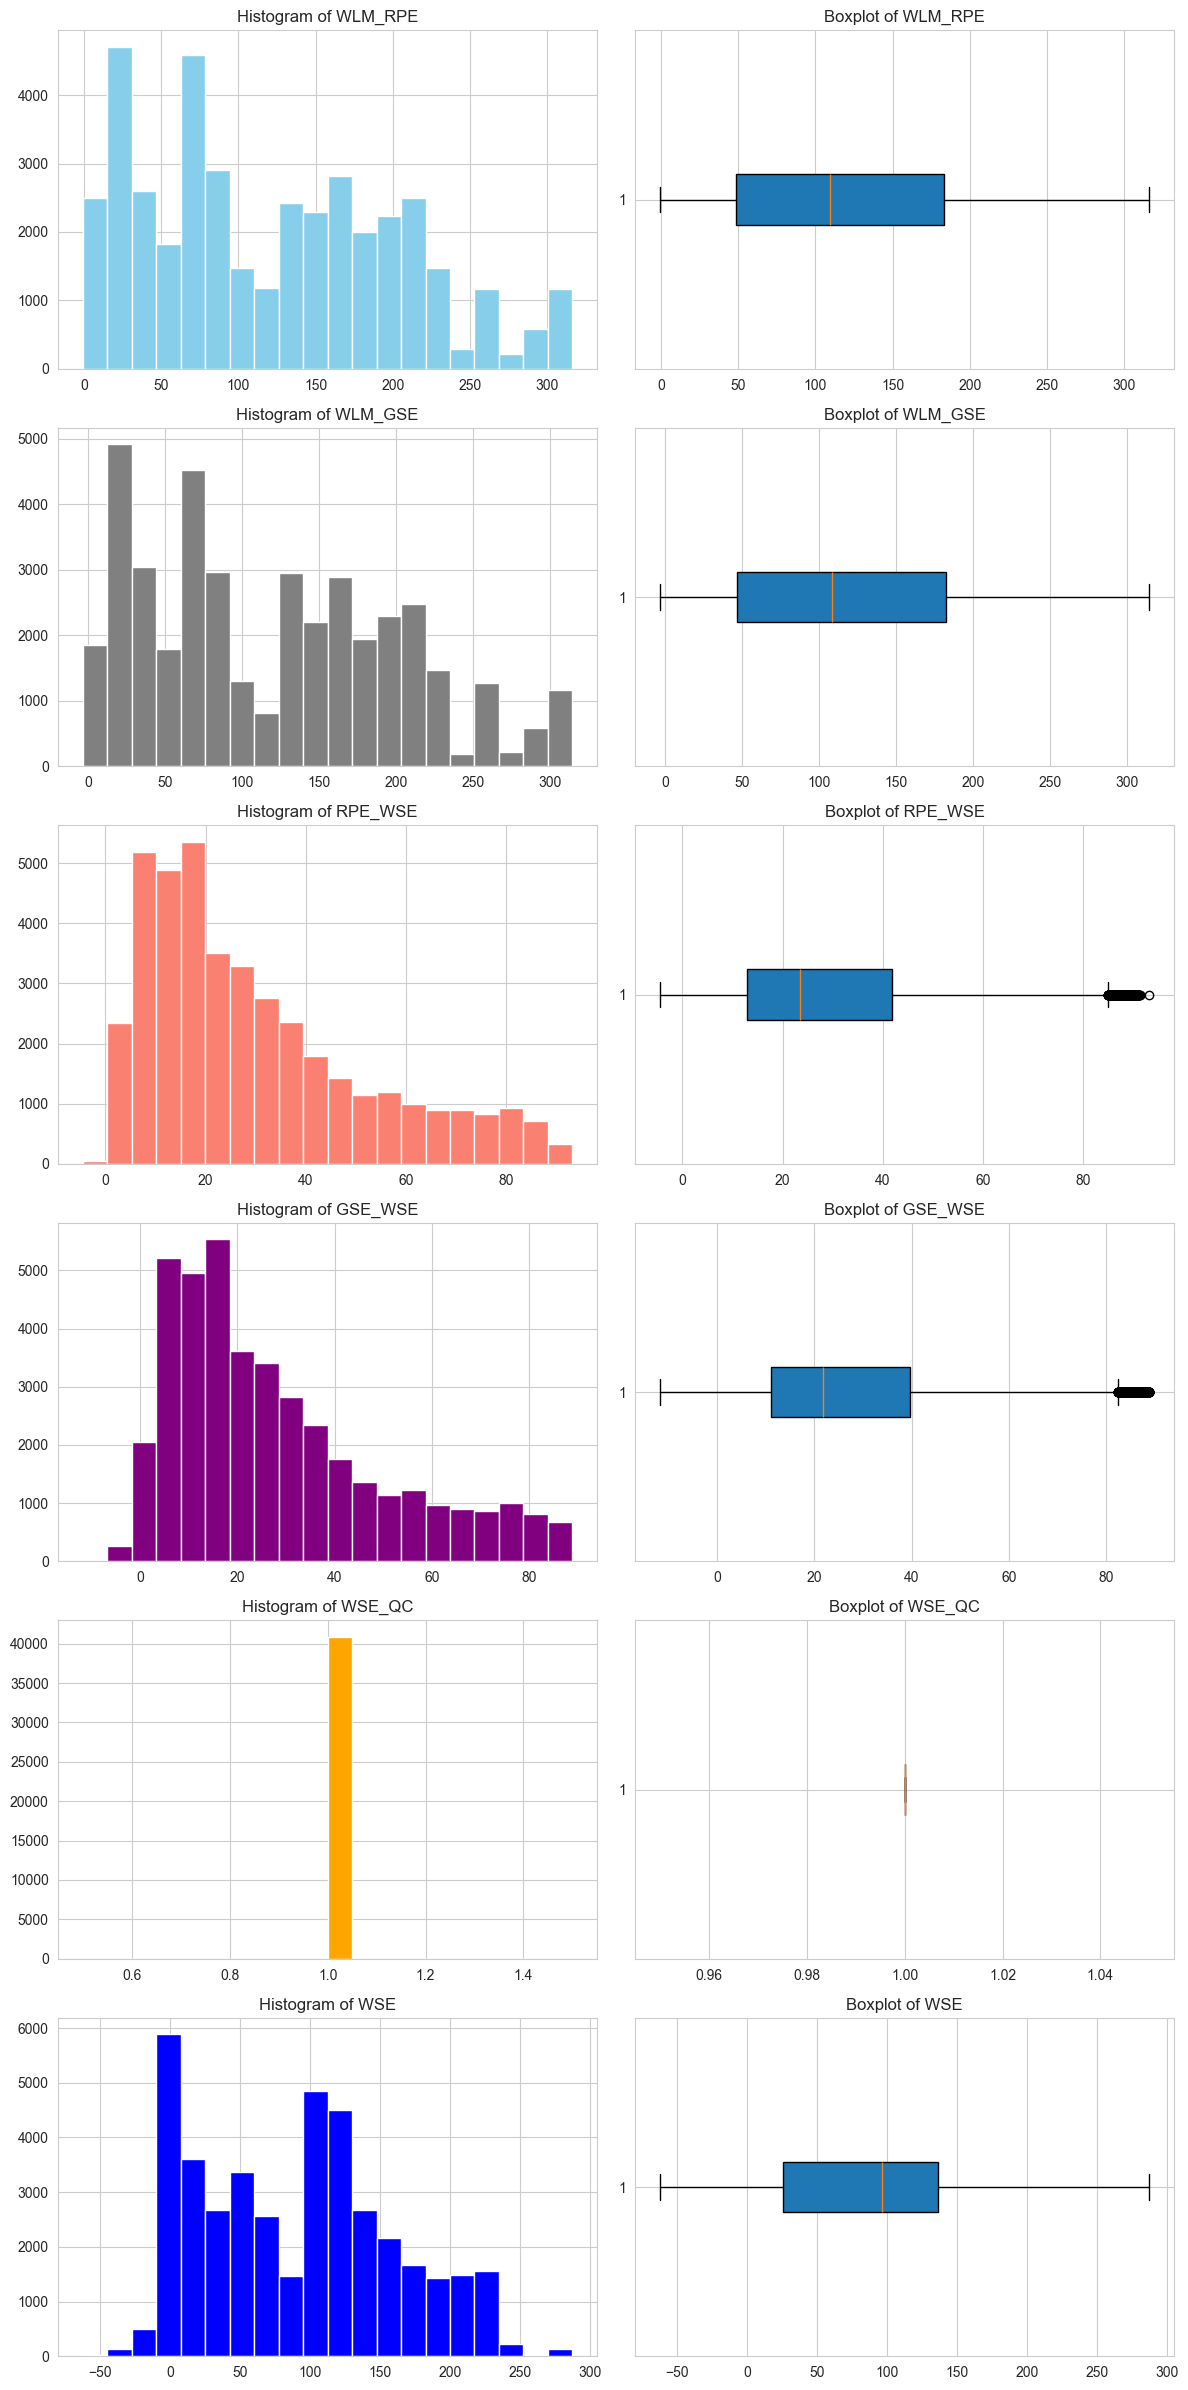

In [17]:
# Define colors for the histograms
colors = ['skyblue', 'gray', 'salmon', 'purple', 'orange', 'blue']
numerical_columns = ['WLM_RPE', 'WLM_GSE', 'RPE_WSE', 'GSE_WSE', 'WSE_QC', 'WSE']
# Set up the matplotlib figure with specified dimensions
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 4 * len(numerical_columns)))

# Loop through each numerical column to create both a histogram and a boxplot
for i, col in enumerate(numerical_columns):
    # Histogram
    axes[i, 0].hist(df[col], bins=20, color=colors[i])
    axes[i, 0].set_title(f'Histogram of {col}')
    
    # Boxplot
    axes[i, 1].boxplot(df[col], vert=False, patch_artist=True, boxprops=dict())
    axes[i, 1].set_title(f'Boxplot of {col}')
    
# Adjust layout for readability
plt.tight_layout()
plt.show()

-------

### Correlation

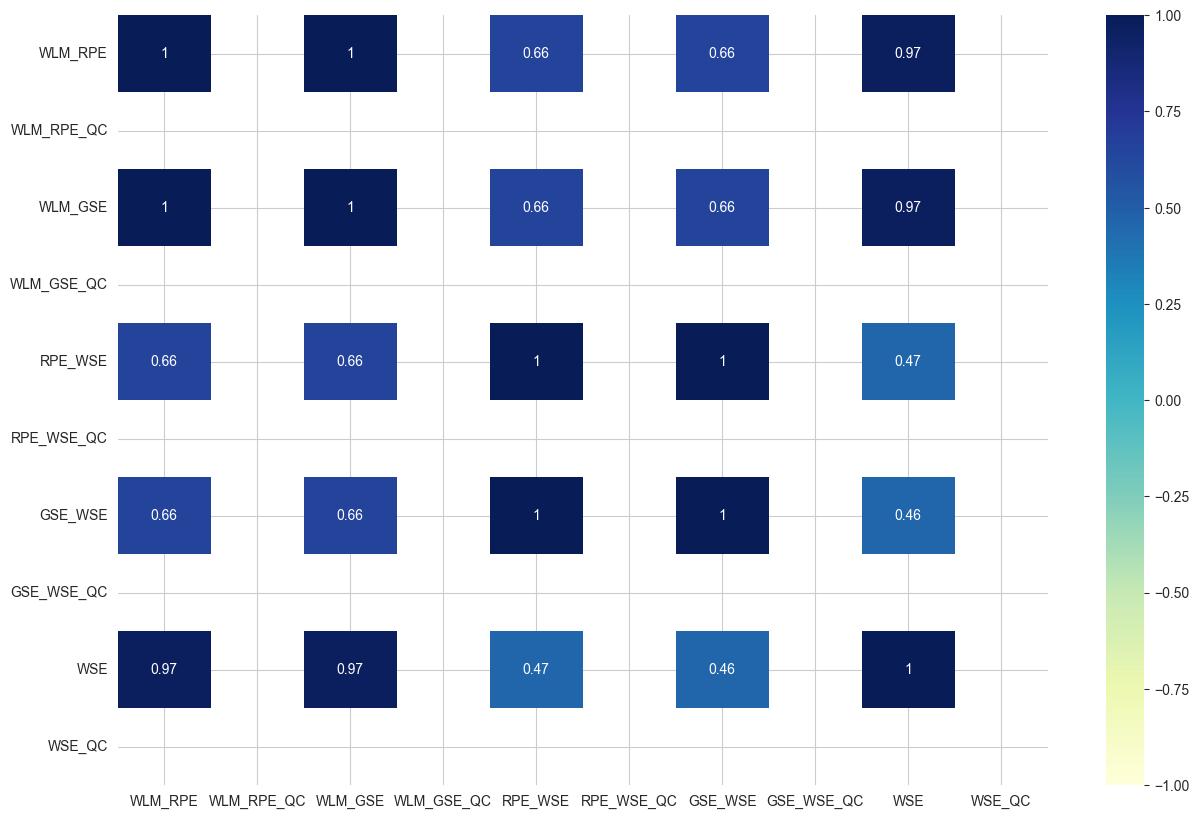

In [18]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Plot correlation heatmap for numeric columns
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
plt.show()

--------------------

# Drop unwanted Columns

In [19]:
cols_to_drop = ['STATION', 'MSMT_DATE', 'WLM_RPE_QC', 'WLM_GSE_QC', 'RPE_WSE_QC', 'GSE_WSE_QC']
df.drop(columns=cols_to_drop, inplace=True)

In [20]:
df.shape

(40904, 6)

In [21]:
df.columns

Index(['WLM_RPE', 'WLM_GSE', 'RPE_WSE', 'GSE_WSE', 'WSE', 'WSE_QC'], dtype='object')

-----------------------------------

# Building Machine Learning Models

### Separate features (X) and target variable (y)

In [22]:
# Splitting features and target
X = df.drop('WSE', axis=1)  # Features excluding 'WSE'
y = df['WSE']  # Target variable, 'WSE'

### Train Test Split

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 1. Linear Regression Model

In [24]:
lin_reg_model = LinearRegression()

In [25]:
# Train the model on the training set
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [26]:
print("Linear Score Average Trained: ", lin_reg_model.score(X_train, y_train))

Linear Score Average Trained:  0.9999999999999629


In [27]:
print("Linear Score Average Tested: ", lin_reg_model.score(X_test, y_test))

Linear Score Average Tested:  0.9999999999999222


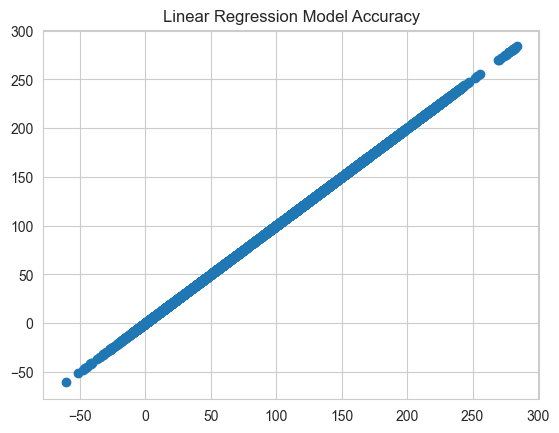

In [28]:
predictions = lin_reg_model.predict(X_test)
plt.title('Linear Regression Model Accuracy')
plt.scatter(y_test,predictions)

-------------------------

## 2. Decision Regression Model

In [29]:
dec_reg_model = DecisionTreeRegressor()

In [30]:
dec_reg_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [31]:
print("Decision tree Score Average Trained: ", dec_reg_model.score(X_train, y_train))

Decision tree Score Average Trained:  1.0


In [32]:
print("Decision tree Score Average Tested: ", dec_reg_model.score(X_test, y_test))

Decision tree Score Average Tested:  0.9999466751713183


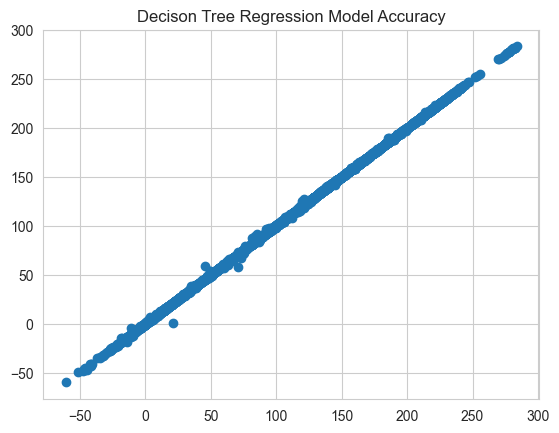

In [33]:
predictions = dec_reg_model.predict(X_test)
plt.title('Decison Tree Regression Model Accuracy')
plt.scatter(y_test,predictions)

---------------------

## 3. Random Forest Regression Model

In [34]:
ran_reg_model = RandomForestRegressor()

In [35]:
ran_reg_model.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
print("Random ForestScore Average Trained: ", ran_reg_model.score(X_train, y_train))

Random ForestScore Average Trained:  0.9999959542501152


In [37]:
print("Random ForestScore Average Tested: ", ran_reg_model.score(X_test, y_test))

Random ForestScore Average Tested:  0.9999796959008549


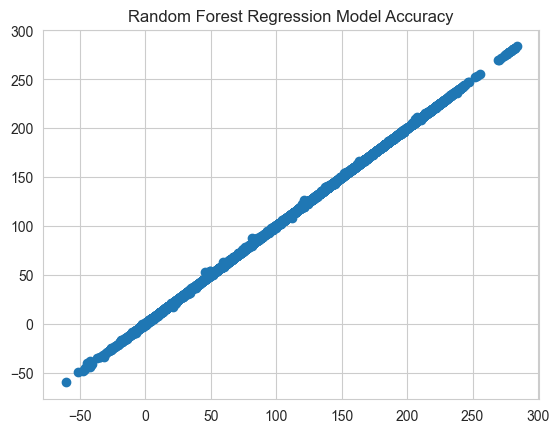

In [38]:
predictions = ran_reg_model.predict(X_test)
plt.title('Random Forest Regression Model Accuracy')
plt.scatter(y_test,predictions)

-----------------------------

## 4. KNN Regression Model

In [39]:
knn_reg_model = KNeighborsRegressor()

In [40]:
knn_reg_model.fit(X_train, y_train)

KNeighborsRegressor()

In [41]:
print("Knn Score Average Trained: ", knn_reg_model.score(X_train, y_train))

Knn Score Average Trained:  0.9999897024847686


In [42]:
print("Knn Score Average Tested: ", knn_reg_model.score(X_test, y_test))

Knn Score Average Tested:  0.9999831683344774


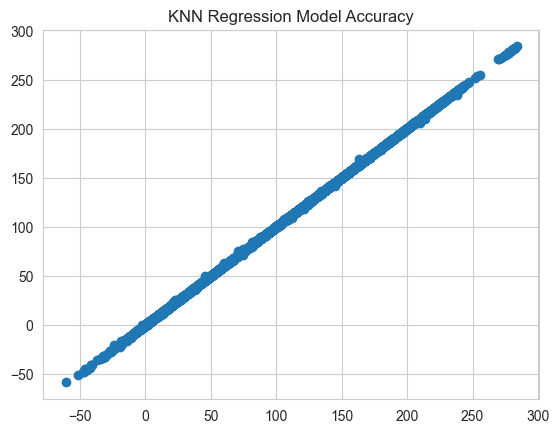

In [43]:
predictions = knn_reg_model.predict(X_test)
plt.title('KNN Regression Model Accuracy')
plt.scatter(y_test,predictions)

----------------

### X.head(4)

In [44]:
df.head(4)

,WLM_RPE,WLM_GSE,RPE_WSE,GSE_WSE,WSE,WSE_QC
67,0.00,0.00,22.673,22.673,-22.673,1
68,10.73,9.63,8.307,7.207,2.423,1
71,-0.57,-2.58,7.302,5.292,-7.872,1
77,5.72,3.52,9.902,7.702,-4.182,1


# Feature Testing

In [45]:
# Features
feature_test = np.array([[18.333, 15.333, 7.801, 4.801, 50]])
result = lin_reg_model.predict(feature_test)

print(result)
print()
print("==========================================================")

[10.53200029]



C:\Users\Harsh Chaudhary\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


---------------

## Model Selection & Deployment
we selected Decision Tree Regression Model

In [46]:
 from joblib import dump

# # Save decision tree Regression model
dump(dec_reg_model, 'model/decision_tree_regressor.joblib')
print("Successfuly Saved or deployed")


Successfuly Saved or deployed
